**Data Ingestion**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# How to read the data files in Python

import pandas as pd
users = pd.read_csv("https://s3.amazonaws.com/asana-data-interview/takehome_users-intern.csv")
user_engagement = pd.read_csv("https://s3.amazonaws.com/asana-data-interview/takehome_user_engagement-intern.csv")

# How to read the data files in R

#users <- read.csv("https://s3.amazonaws.com/asana-data-interview/takehome_users-intern.csv")
#user_engagement <- read.csv("https://s3.amazonaws.com/asana-data-interview/takehome_user_engagement-intern.csv")

**1) Calculating Adoption Rate**

In [ ]:
user_engagement

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [ ]:
#converting the timestamp using datetime functon

user_engagement['time_stamp'] = pd.to_datetime(user_engagement['time_stamp'])

In [ ]:
# Function to check if a user is adopted

def is_adopted(group):
    if len(group) < 3:
        return False
    for i in range(len(group) - 2):
        if (group['time_stamp'].iloc[i + 2] - group['time_stamp'].iloc[i]).days <= 7:
            return True
    return False

In [ ]:
#applying the fuction to the user_engagement data

adopted_users = user_engagement.groupby('user_id').apply(is_adopted)
adopted_users = adopted_users[adopted_users].index.tolist()

user_engagement['adopted'] = user_engagement['user_id'].apply(lambda x: 'yes' if x in adopted_users else 'no')

In [ ]:
user_engagement

,time_stamp,user_id,visited,adopted
0,2014-04-22 03:53:30,1,1,no
1,2013-11-15 03:45:04,2,1,yes
2,2013-11-29 03:45:04,2,1,yes
3,2013-12-09 03:45:04,2,1,yes
4,2013-12-25 03:45:04,2,1,yes
...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,no
207913,2013-01-15 18:28:37,11997,1,no
207914,2014-04-27 12:45:16,11998,1,no
207915,2012-06-02 11:55:59,11999,1,no


In [ ]:
#checking the first five rows of the users data table

users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain
0,1,4/22/14 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com
1,2,11/15/13 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com
2,3,3/19/13 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com
3,4,5/21/13 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com
4,5,1/17/13 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com


In [ ]:
# Extract unique user_id and their adopted status

adopted_status = user_engagement[['user_id', 'adopted']].drop_duplicates()

# Merge with takehome_users

merged_data = pd.merge(users, adopted_status, left_on='object_id', right_on='user_id', how='left')

In [ ]:
merged_data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,user_id,adopted
0,1,4/22/14 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com,1.0,no
1,2,11/15/13 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2.0,yes
2,3,3/19/13 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com,3.0,no
3,4,5/21/13 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com,4.0,no
4,5,1/17/13 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com,5.0,no


In [ ]:
# Fill missing values in the adopted column with 'no' (assuming users not in user_engagement are not adopted)

merged_data['adopted'].fillna('no', inplace=True)

**Adoption Rate**

In [ ]:
adopted_users_count = merged_data[merged_data['adopted'] == 'yes'].shape[0]
total_users_count = merged_data.shape[0]

adoption_rate = adopted_users_count / total_users_count
adoption_rate_percentage = adoption_rate * 100  # Convert to percentage
adoption_rate_percentage

13.8

Adoption Rate = 13.8%

**2) Methodology**

In [ ]:
#checking for missing data in the dataset

merged_data.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
email_domain                     0
user_id                       3177
adopted                          0
dtype: int64

In [ ]:
#summary statistics of the merged data

merged_data.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000,8823.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145,6019.821716
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968,3464.251001
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000,1.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000,3017.500000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000,6034.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000,9029.500000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000,12000.000000


In [ ]:
# Converting the creation_time to a Unix timestamp to match the format of last_session_creation_time
merged_data['creation_time_ux'] = merged_data['creation_time'].apply(lambda x: pd.Timestamp(x).timestamp())


# Filling in the missing values in last_session_creation_time with the corresponding creation_time_unix
merged_data['last_session_creation_time'].fillna(merged_data['creation_time_ux'], inplace=True)

# Droping the temporary creation_time_unix column
merged_data.drop(columns=['creation_time_ux'], inplace=True)

In [ ]:
#filling the missing values of invited_by_user_id with 0

merged_data['invited_by_user_id'].fillna(0,inplace=True)

In [ ]:
#Calculating the mean of the user_id

user_id_mean = merged_data['user_id'].mean()

#Filling missing values in the user_id with the calculated mean

merged_data['user_id'].fillna(user_id_mean, inplace=True)

In [ ]:
#rechecking for missing values

merged_data.isnull().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
email_domain                  0
user_id                       0
adopted                       0
dtype: int64

In [ ]:
#encoding the adopted column

merged_data['adopted_encoded']= merged_data['adopted'].map({'yes':1,'no':0})

In [ ]:
#converting the creation_time to a datetime object

merged_data['creation_time']= pd.to_datetime(merged_data['creation_time'])

#extracting the year, month and day components

merged_data['creation_year']=merged_data['creation_time'].dt.year
merged_data['creation_month']=merged_data['creation_time'].dt.month
merged_data['creation_day']=merged_data['creation_time'].dt.day
merged_data.head()

<ipython-input-62-bc8c491ebd12>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['creation_time']= pd.to_datetime(merged_data['creation_time'])


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,user_id,adopted,adopted_encoded,creation_year,creation_month,creation_day
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com,1.0,no,0,2014,4,22
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2.0,yes,1,2013,11,15
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com,3.0,no,0,2013,3,19
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com,4.0,no,0,2013,5,21
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com,5.0,no,0,2013,1,17


Exploratory Data Analysis

In [ ]:
#grouping by creation source and calculating the adoption rate by creation source

adoption_rate_by_source=merged_data.groupby('creation_source')['adopted_encoded'].mean()
adoption_rate_by_source
adoption_rate_by_source_percentage=adoption_rate_by_source*100
adoption_rate_by_source_percentage

creation_source
GUEST_INVITE          17.059639
ORG_INVITE            13.493183
PERSONAL_PROJECTS      8.147797
SIGNUP                14.470532
SIGNUP_GOOGLE_AUTH    17.256318
Name: adopted_encoded, dtype: float64

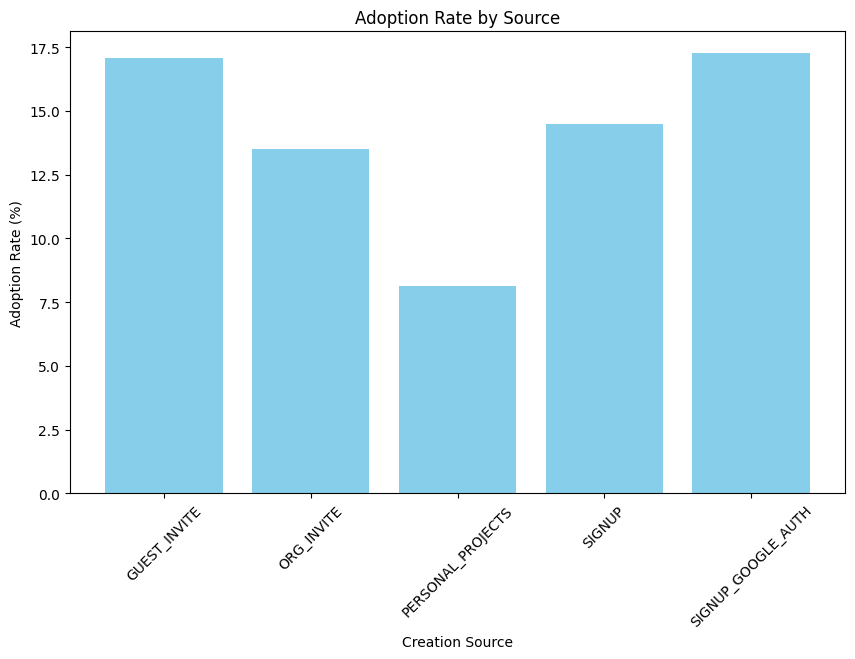

In [ ]:
# Plotting a bar chart of adoption rates by creation source

plt.figure(figsize=(10, 6))
plt.bar(adoption_rate_by_source.index, adoption_rate_by_source * 100, color='skyblue')
plt.xlabel('Creation Source')
plt.ylabel('Adoption Rate (%)')
plt.title('Adoption Rate by Source')
plt.xticks(rotation=45)
plt.show()

From the bar chart, we can see that the users whos signed up through signup_google_auth have the highest adoption rate by creation source, followed by those invited to an organization as a guest.
Following the top 2 are users who signed up through asana.com, users who signed up through organization invite comes next and the least adoption rate by creation source are those who signed up through personal_projects.

In [ ]:
# Grouping by 'creation_year' and calculating the mean adoption rate for each year

adoption_rate_by_year = merged_data.groupby('creation_year')['adopted_encoded'].mean()
adoption_rate_by_year
adoption_rate_by_year_percentage=adoption_rate_by_year*100
adoption_rate_by_year_percentage

creation_year
2012    16.732213
2013    15.415786
2014     8.874398
Name: adopted_encoded, dtype: float64

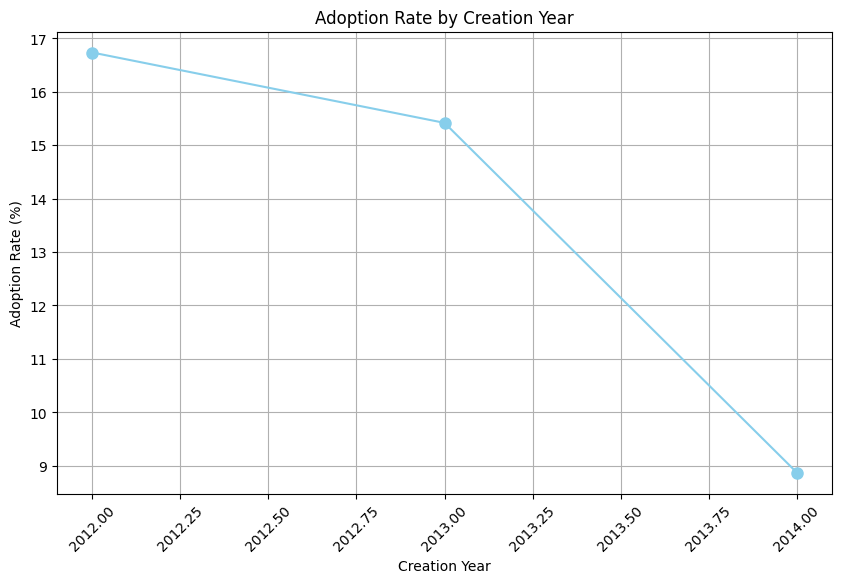

In [ ]:
# Plotting a line graph of adoption rate by year

plt.figure(figsize=(10, 6))
plt.plot(adoption_rate_by_year.index, adoption_rate_by_year * 100, marker='o', color='skyblue', linestyle='-', markersize=8)
plt.xlabel('Creation Year')
plt.ylabel('Adoption Rate (%)')
plt.title('Adoption Rate by Creation Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The line plot shows a slight decline of adoption rate from year 2012 through the first quarter of 2012 to year 2013.
From year 2013, all quarters of year 2013 down to year 2014 shows a massive drop in adoption rate.

In [ ]:
# Grouping by 'creation_month' and calculate the mean adoption rate for each month

adoption_rate_by_month = merged_data.groupby('creation_month')['adopted_encoded'].mean()
adoption_rate_by_month_percentage=adoption_rate_by_month*100
adoption_rate_by_month_percentage

creation_month
1     14.577259
2     14.668094
3     13.933730
4      9.837468
5      5.360825
6     18.192628
7     14.436620
8     17.018779
9     15.760266
10    17.532468
11    16.132479
12    14.623656
Name: adopted_encoded, dtype: float64

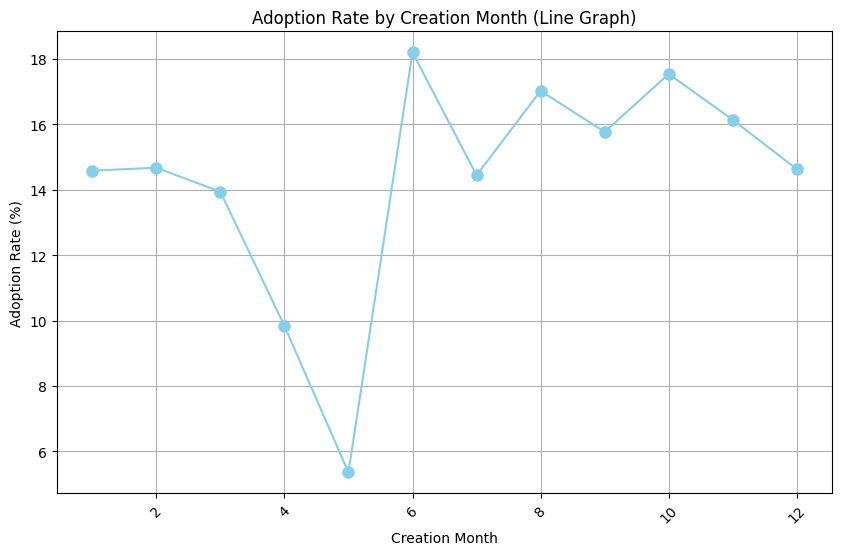

In [ ]:
# Ploting a line graph of adoption rate by month

plt.figure(figsize=(10, 6))
plt.plot(adoption_rate_by_month.index, adoption_rate_by_month * 100, marker='o', color='skyblue', linestyle='-', markersize=8)
plt.xlabel('Creation Month')
plt.ylabel('Adoption Rate (%)')
plt.title('Adoption Rate by Creation Month (Line Graph)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The scatter plot shows that we have a steep drop from the second month of the year(Feburary) to the fifth month of the year (May). We then see a sharp increase from may to the 6th month of the year (June) after which a slight decline can be seen in the seventh month (July).
We have flunctuations in adoption rate from july to the 11th month of the year, then a further slight decline in the 12th month (december).

It can be noted that the month of june has the highest adoption rate and the month of may has the lowest adoption rate.

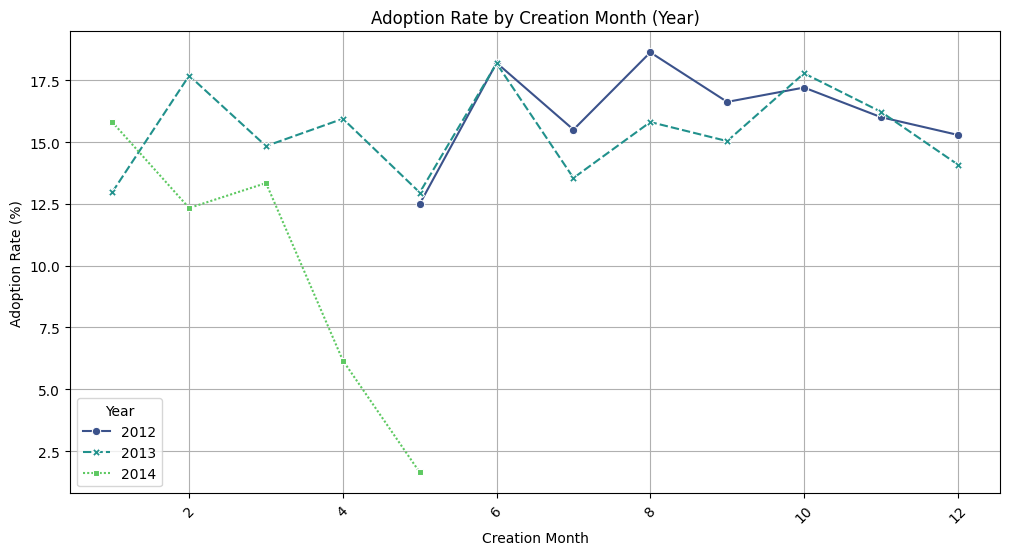

In [ ]:
#Grouping by 'creation_month' and 'creation_year' and calculate the mean adoption rate for each month and year

adoption_rate_by_month_and_year = merged_data.groupby(['creation_month', 'creation_year'])['adopted_encoded'].mean().unstack()

#Ploting a line graph of adoption rate by month with hue by year

plt.figure(figsize=(12, 6))
sns.lineplot(data=adoption_rate_by_month_and_year * 100, markers=True, palette='viridis')
plt.xlabel('Creation Month')
plt.ylabel('Adoption Rate (%)')
plt.title('Adoption Rate by Creation Month (Year)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Year')
plt.show()

In year 2012, we have flunctuations in adoption rate from the month of may to the end of the year.
Year 2013 follows a similar pattern in flunctuations in adoption rate from the begining of the year to the end of year 2013. Both year 2012 and year 2014 have the highest adoption rate in the month of june.

The year 2014 does not follow the same pattern as the two previous years, year 2014 is shown to have a massive reduction in adoption rate from the month of march to the month of may.



In [ ]:
# Grouping by 'creation_day' and calculate the mean adoption rate for each day

adoption_rate_by_day = merged_data.groupby('creation_day')['adopted_encoded'].mean()
adoption_rate_by_day_percentage= adoption_rate_by_day*100
adoption_rate_by_day_percentage

creation_day
1     15.384615
2     13.636364
3     12.189055
4     14.406780
5     16.576087
6     13.793103
7     15.977961
8     11.466667
9     13.858696
10    14.285714
11    18.465228
12    14.246575
13    14.393939
14    14.545455
15    13.506494
16    16.624041
17    14.030612
18    13.711584
19    13.043478
20    13.936430
21    10.837438
22    11.928934
23    15.107914
24    11.306533
25    10.864198
26    11.398964
27    14.454976
28    13.808463
29    15.625000
30    10.204082
31    14.705882
Name: adopted_encoded, dtype: float64

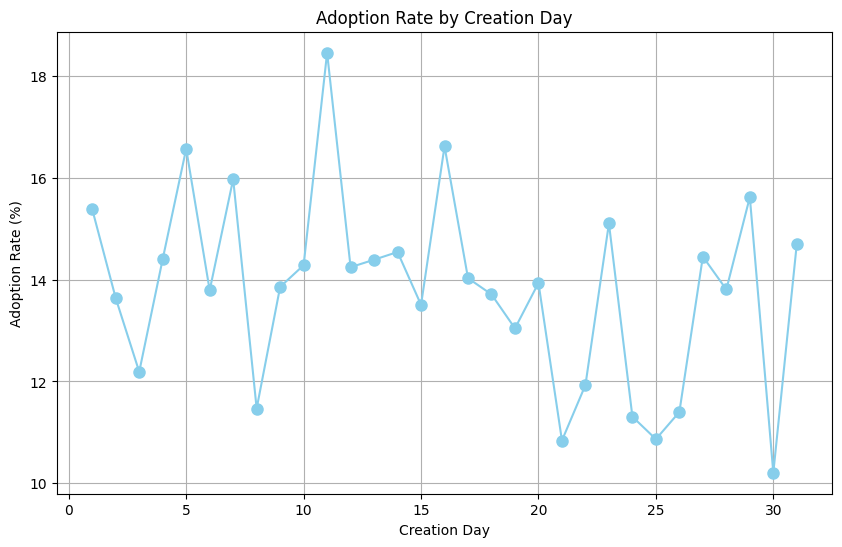

In [ ]:
# Plotting a line graph with markers of adoption rate by day

plt.figure(figsize=(10, 6))
plt.plot(adoption_rate_by_day.index, adoption_rate_by_day * 100, marker='o', color='skyblue', linestyle='-', markersize=8)
plt.xlabel('Creation Day')
plt.ylabel('Adoption Rate (%)')
plt.title('Adoption Rate by Creation Day')
plt.grid(True)
plt.show()

From the line graph we can see fluctuations on different days of the month. The most notable is the highest adoption rate observed on the 11th day of the month while the lowest adoption rate is seen on the 30th day of the month.

In [ ]:
# Grouping by 'opted_in_to_mailing_list' and calculating the mean adoption rate for each group

adoption_rate_by_mailing_list = merged_data.groupby('opted_in_to_mailing_list')['adopted_encoded'].mean()
adoption_rate_by_mailing_list_percentage= adoption_rate_by_mailing_list*100
adoption_rate_by_mailing_list_percentage

opted_in_to_mailing_list
0    13.624250
1    14.328657
Name: adopted_encoded, dtype: float64

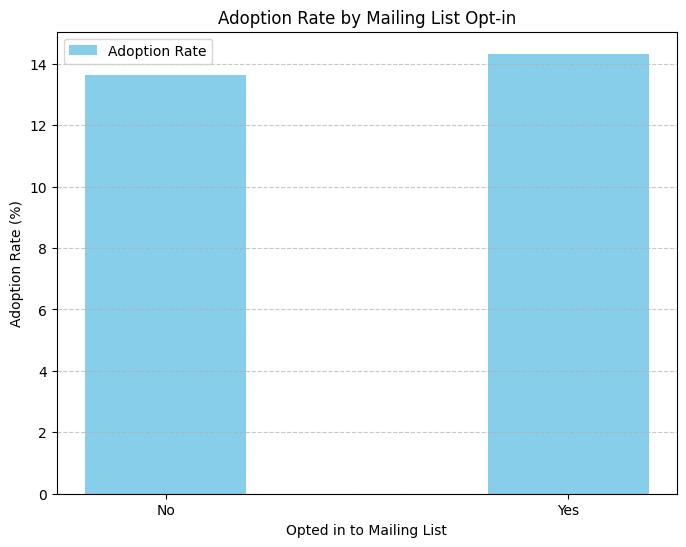

In [ ]:
# Defining the bar positions

bar_positions = np.arange(len(adoption_rate_by_mailing_list))

# Creating the grouped bar chart

plt.figure(figsize=(8, 6))
plt.bar(bar_positions, adoption_rate_by_mailing_list * 100, width=0.4, color='skyblue', label='Adoption Rate', align='center')
plt.xlabel('Opted in to Mailing List')
plt.ylabel('Adoption Rate (%)')
plt.title('Adoption Rate by Mailing List Opt-in')
plt.xticks(bar_positions, ['No', 'Yes'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This bar chart shows that people who opted in to the mailing list have a higher adoption rate than those who did not.
We can also note that we do not have too much significant difference in the adoption rate of those who opted in to the mailing list and those who did not opt in to the mailing list.

In [ ]:
# Grouping by 'enabled_for_marketing_drip' and calculate the mean adoption rate for each group

adoption_rate_by_drip = merged_data.groupby('enabled_for_marketing_drip')['adopted_encoded'].mean()
adoption_rate_by_drip_percentage= adoption_rate_by_drip*100
adoption_rate_by_drip_percentage

enabled_for_marketing_drip
0    13.704937
1    14.341518
Name: adopted_encoded, dtype: float64

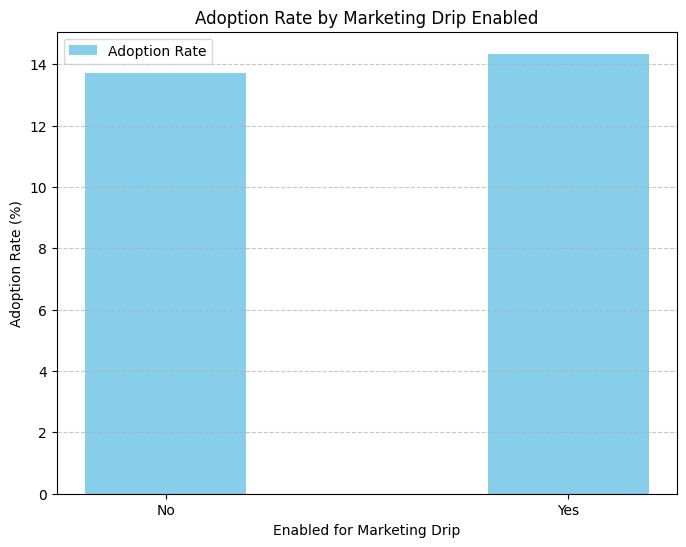

In [ ]:
# Defining the bar positions

bar_positions = np.arange(len(adoption_rate_by_drip))

# Creating the grouped bar chart

plt.figure(figsize=(8, 6))
plt.bar(bar_positions, adoption_rate_by_drip * 100, width=0.4, color='skyblue', label='Adoption Rate', align='center')
plt.xlabel('Enabled for Marketing Drip')
plt.ylabel('Adoption Rate (%)')
plt.title('Adoption Rate by Marketing Drip Enabled')
plt.xticks(bar_positions, ['No', 'Yes'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This bar chart shows that people who have their regular marketing email
drip enabled have a higher adoption rate than those who did not. We can note that we do not have too much significant difference in the adoption rate of those who have their regular marketing email
drip enabled and those who did not who did not have their regular marketing email drip enabled.

We can also infer from the graphs of opt_in_to_mailing_list vs the adoption_raterate and the graph of enabled_marketing_drip vs adoption_rate that most persons who opted in to the mailing list also have their regular marketing email drip enabled.

In [ ]:
# Grouping data by 'org_id' and calculate the mean adoption rate for each organization

adoption_rate_by_org = merged_data.groupby('org_id')['adopted_encoded'].mean()

# Extracting org_id and corresponding adoption rate

org_ids = adoption_rate_by_org.index
adoption_rates_by_org_percentage= adoption_rate_by_org * 100
adoption_rates_by_org_percentage

org_id
0       3.761755
1       6.866953
2       7.462687
3       8.333333
4      10.691824
         ...    
412     0.000000
413    18.750000
414    10.000000
415    37.500000
416     0.000000
Name: adopted_encoded, Length: 417, dtype: float64

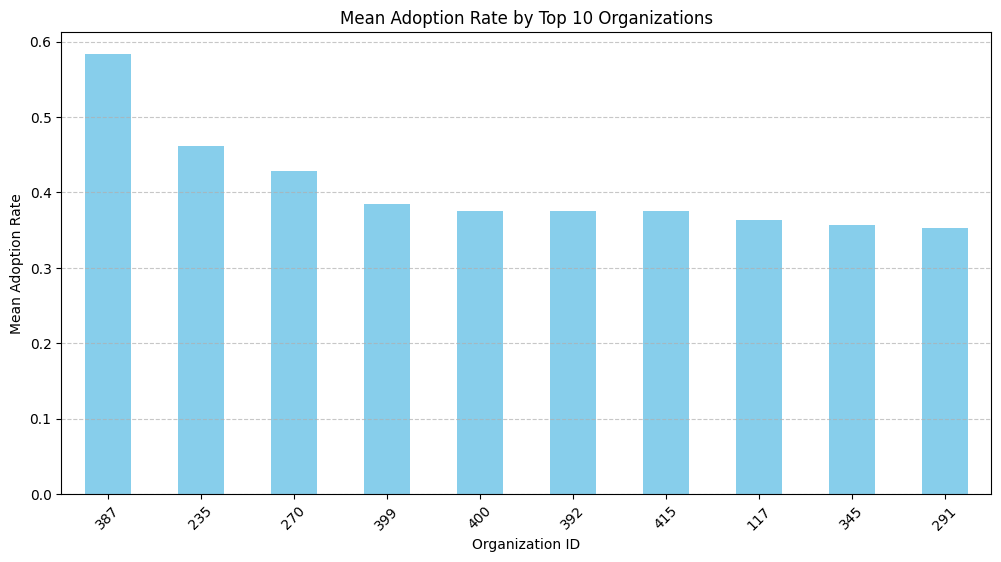

In [ ]:
#Grouping by 'org_id' and calculating the mean adoption rate for each group

adoption_rate_by_org = merged_data.groupby('org_id')['adopted_encoded'].mean()

#Sorting by mean adoption rate

adoption_rate_by_org = adoption_rate_by_org.sort_values(ascending=False)

#Selecting the top 10 organizations for better visualization

top_orgs = adoption_rate_by_org.head(10)

#Creating a grouped bar chart

plt.figure(figsize=(12, 6))
top_orgs.plot(kind='bar', color='skyblue')
plt.xlabel('Organization ID')
plt.ylabel('Mean Adoption Rate')
plt.title('Mean Adoption Rate by Top 10 Organizations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The graph shows the top 10 oragnizations whose members adopted. Organization with id 387 has the highest number of adopted users. Further studies can be done to know why members of these organizations are adopting more.


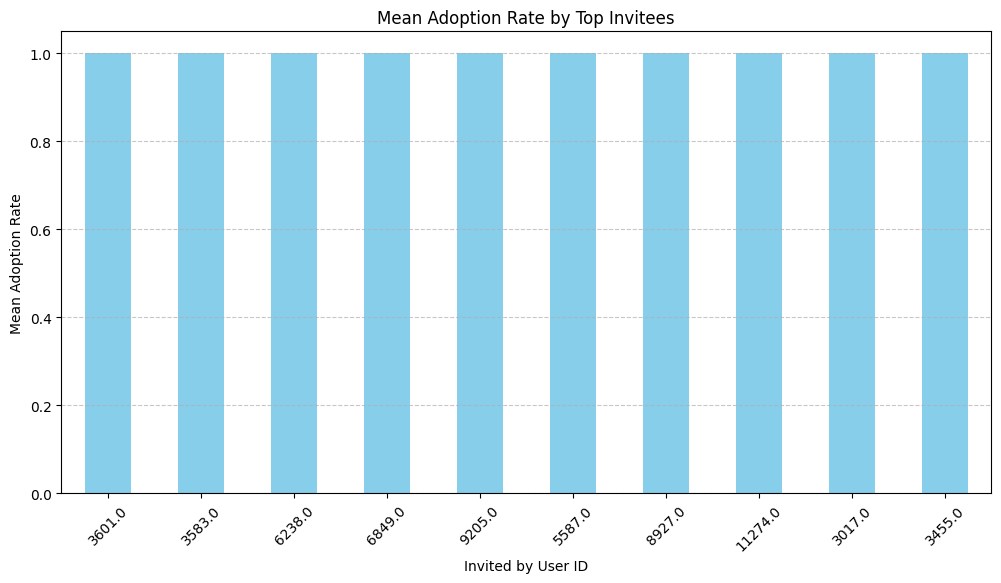

In [ ]:
#Grouping by 'invited_by_user_id' and calculate the mean adoption rate for each group

adoption_rate_by_invitee = merged_data.groupby('invited_by_user_id')['adopted_encoded'].mean()

#Sorting by mean adoption rate

adoption_rate_by_invitee = adoption_rate_by_invitee.sort_values()

#Selecting a subset of top invitees for better visualization

top_invitees = adoption_rate_by_invitee.tail(10)

#Creating a grouped bar chart

plt.figure(figsize=(12, 6))
top_invitees.plot(kind='bar', color='skyblue')
plt.xlabel('Invited by User ID')
plt.ylabel('Mean Adoption Rate')
plt.title('Mean Adoption Rate by Top Invitees')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This bar chart tells us the top 10 users id who invited other users and they adopted. Incentives can be given to this users whose invitees adopted, this can encourage more adoption.

**2a) Writeup associated with methodology**

I started by checking for missing values in our dataset. The columns with missing values were last_session_creation_time and invited_by_user_id. I filled the missing values of last_session_creation_time with creation_time due to the fact that the user might have only logged on at the creation_time. I filled the missing invited_by_user_id column with 0 because these set of users might have signup at asana.com without any invite.

I went on to carry out summary statistics on the data after which I encoded the adoption column for easy visualization. Exploratory data analysis is then done to see the relationship between different data colums and the adoption_encoded mean.

**3) What Factors Predict User Adoption?**
​

In [ ]:
#Calculating the frequency of logins

user_engagement['time_stamp'] = pd.to_datetime(user_engagement['time_stamp'])
login_frequency = user_engagement.groupby('user_id')['time_stamp'].count().reset_index()
login_frequency.rename(columns={'time_stamp': 'login_frequency'}, inplace=True)

#Merging login frequency with user data

merged_data_freq = pd.merge(merged_data, login_frequency, on='user_id', how='left')
merged_data_freq.head()

<ipython-input-79-9bec08e8f9ee>:9: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_data_freq = pd.merge(merged_data, login_frequency, on='user_id', how='left')


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,user_id,adopted,adopted_encoded,creation_year,creation_month,creation_day,login_frequency
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com,1.0,no,0,2014,4,22,1.0
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2.0,yes,1,2013,11,15,14.0
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com,3.0,no,0,2013,3,19,1.0
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com,4.0,no,0,2013,5,21,1.0
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com,5.0,no,0,2013,1,17,1.0


In [ ]:
#Calculating the mean of the 'login_frequency' column

login_frequency_mean = merged_data_freq['login_frequency'].mean()

#Filling missing values in the 'login_frequency' column with the calculated mean

merged_data_freq['login_frequency'].fillna(login_frequency_mean, inplace=True)

In [ ]:
#rechecking for missing values

merged_data_freq.isnull().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
email_domain                  0
user_id                       0
adopted                       0
adopted_encoded               0
creation_year                 0
creation_month                0
creation_day                  0
login_frequency               0
dtype: int64

In [ ]:
#select only numeric columns
numeric_columns = merged_data_freq.select_dtypes(include=[np.number])

#calculate correlation matrix
corr= numeric_columns.corr()


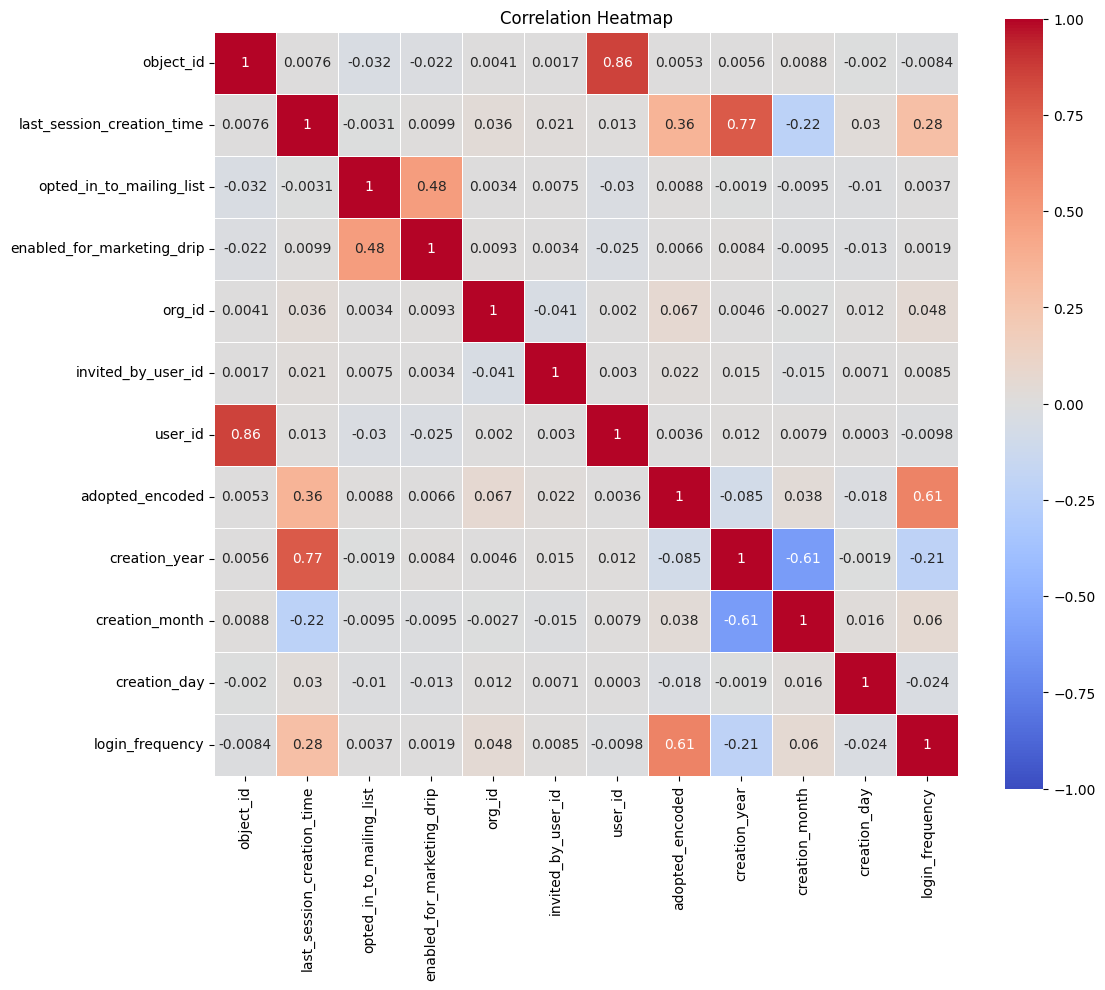

In [ ]:
# Setting up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generating a heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True, linewidths=.5)

# Setting the title
plt.title('Correlation Heatmap')

plt.show()

In [ ]:
features = ['creation_source','creation_month','invited_by_user_id','org_id','login_frequency']
X = merged_data_freq[features]

In [ ]:
Y = merged_data['adopted_encoded']

In [ ]:
le = LabelEncoder()
X['creation_source'] = le.fit_transform(X['creation_source'])

<ipython-input-86-c415b87271c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['creation_source'] = le.fit_transform(X['creation_source'])


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model on the resampled training data
random_forest_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = random_forest_model.predict(X_test)

In [ ]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.985

In [ ]:
#calculating recall
recall = recall_score(y_test, y_pred)
recall

0.9614243323442137

In [ ]:
#calculating precision
precision = precision_score(y_test, y_pred)
precision

0.9337175792507204

In [ ]:
#Calculating the F1 score
f1 = f1_score(y_test, y_pred)
f1

0.9473684210526316

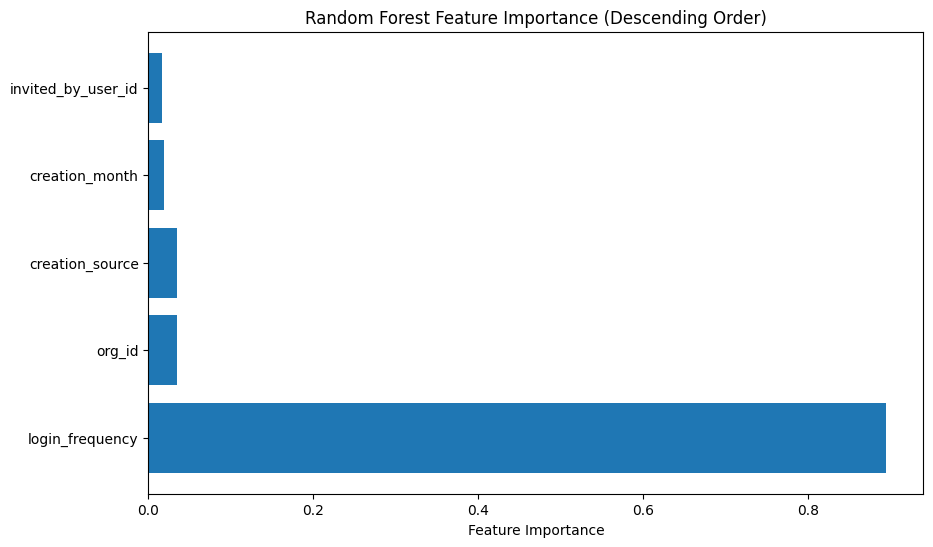

In [ ]:
#Ploting feature importance (for Random Forest)
importances = random_forest_model.feature_importances_
feature_names = features
indices = (-importances).argsort()

#Ploting feature importance (for Random Forest) in descending order
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances[indices], align='center')
plt.yticks(range(len(features)), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance (Descending Order)')
plt.show()

**3a) Writeup associated with what factors predict user adoption?**

After carrying out our exploratory data analysis, I also calculated login frequencies and merged it with the user_data to enable our model to make a better prediction of adopted users.

I went ahead to build a model (RandomForest Classifier) to predict whether the user will be adopted based on these selected features. Metrics such as accuracy, precision, recall, f1-score has been used to check the model's performance.

I used feature importance to see what features have the most influence on user adoption. From the bar graph, login_in frequency have the highest feature importance followed by org_id. Creation_source, creation_month, invited_by_user_id follows next respectively.

In the exploratory data analysis, we saw that there was no significant difference between users who opted_in_to_mailing_list and enabled_for_marketing_drip and those who did not. They also have the least feature importance so therefore, they have the least infleunce on user adoption.

Therefore, we can conclude that login_in frequency, org_id, creation_source, creation_month and invited_by_user_id are factors that predict user adoption.

**4) Additional Commentary**

Org_id is the second highest on our feature importance. We can decide to partner with such organizations to increase adoption or understudy them to see why users are adopting more in these organizations. The top organzations can be seen in our exploratory data analysis section.

Creation source is our third highest feature importance and we can create incentives for our top creation sources as seen in the earlier part of our exploratory data analysis.

